# Example 15 - Error analysis

In this example, we'll conduct error analysis of the results: (1) confusion matrix, (2) other negative cases, get examples. 

In [1]:
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    "grid.linestyle": '--',
})

In [2]:
pkl_dir = "pkl/"
fig_dir = "figures/"

In [3]:
with open(pkl_dir + "res_co_training_HC_confusion.pkl", "rb") as handle:
    matrix_HC = pickle.load(handle)
    print(matrix_HC)
    matrix_HC = np.array(matrix_HC).T.tolist() # transpose
    # remove later columns
    # matrix_HC = matrix_HC[:2]

[[106, 11, 0, 0], [7, 108, 0, 0]]


In [4]:
with open(pkl_dir + "res_co_training_CNN_confusion.pkl", "rb") as handle:
    matrix_CNN = pickle.load(handle)
    print(matrix_CNN)
    matrix_CNN = np.array(matrix_CNN).T.tolist()
    # matrix_CNN = matrix_CNN[:2]

[[92, 37, 0, 0], [21, 82, 0, 0]]


In [5]:
# 'Unclassified regions': 1, 'krill_schools': 2, 'fish_school': 3, 'AH_School': 4
# 0: AH school, 1: Other fish school, 2: Krill school, 3: Other region

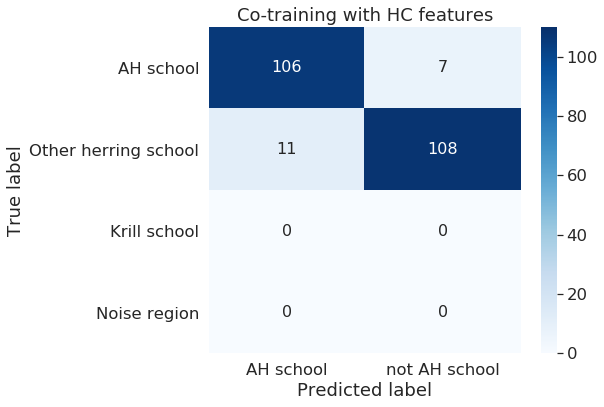

In [8]:
df_HC = pd.DataFrame(matrix_HC, index=['AH school', 'Other herring school', 'Krill school', 'Noise region'], columns=['AH school', 'not AH school'])
fig, ax = plt.subplots(figsize=(7, 6))
g = sns.heatmap(df_HC, annot=True, annot_kws={"size": 16}, cmap="Blues", vmin=0, vmax=110, fmt='g') # font size, , "ha": 'center',"va": 'bottom'
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Co-training with HC features')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0) 
plt.savefig('figures/confusion_1.png', dpi=300, bbox_inches='tight')
plt.show()

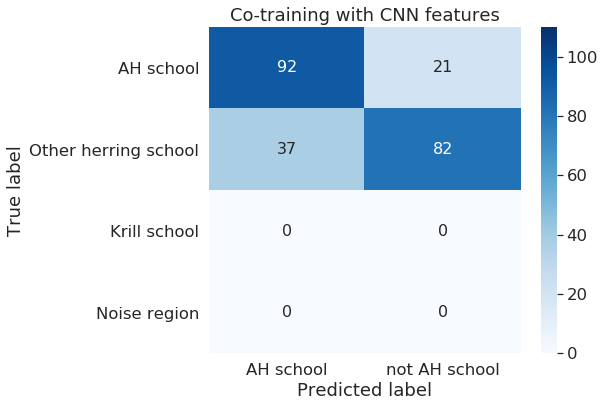

In [9]:
df_CNN = pd.DataFrame(matrix_CNN, index=['AH school', 'Other herring school', 'Krill school', 'Noise region'], columns=['AH school', 'not AH school'])
fig, ax = plt.subplots(figsize=(7, 6))
g = sns.heatmap(df_CNN, annot=True, annot_kws={"size": 16}, cmap="Blues", vmin=0, vmax=110, fmt='g') # font size, , "ha": 'center',"va": 'bottom'
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Co-training with CNN features')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0) 
plt.savefig('figures/confusion_2.png', dpi=300, bbox_inches='tight')
plt.show()